In [38]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [46]:
stop_words = stopwords.words('english')

In [2]:
data = pd.read_csv("linkedin.csv")
data.head(3)

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."


In [3]:
data = data[['description','category']]
data.head(3)

,description,category
0,"An experienced HR professional, HR mentor and...",HR
1,"Head Talent Acquisition, HR Leader and Strateg...",HR
2,A Talent Acquisition and HR professional with ...,HR


In [6]:
data.isna().sum()

description    581
category         0
dtype: int64

In [8]:
len(data.category.unique())

25

In [11]:
data1 = data.dropna()

In [13]:
data1.head(3)

,description,category
0,"An experienced HR professional, HR mentor and...",HR
1,"Head Talent Acquisition, HR Leader and Strateg...",HR
2,A Talent Acquisition and HR professional with ...,HR


In [14]:
data1.isna().sum()

description    0
category       0
dtype: int64

In [15]:
len(data1)

670

In [16]:
len(data1.category.unique())

25

In [18]:
data1.category.value_counts()

Public Relations           41
Health & Fitness           40
Digital Media              38
Engineering                36
Consultant                 36
Business Development       36
Sales                      35
HR                         34
Food & Beverages           28
Information Technology     28
Accountant                 27
Banking                    26
Building & Construction    25
Advocate                   25
Education                  24
Designing                  23
Aviation                   23
Agricultural               22
Finance                    21
Arts                       20
Apparel                    19
Architects                 19
Managment                  17
Automobile                 14
BPO                        13
Name: category, dtype: int64

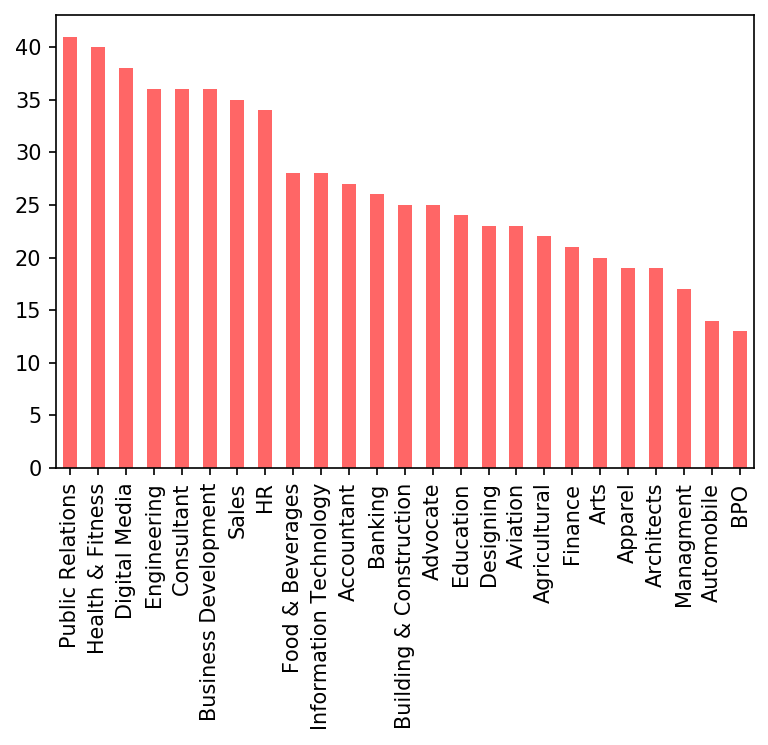

In [32]:
plt.figure(dpi=150)
data1.category.value_counts().plot(kind = 'bar', color = 'red', alpha = 0.6)
plt.show()

In [53]:
def preprocess_text(text):
    text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(filtered_words).lower()

In [54]:
data1['description'][0]

'An experienced HR professional,  HR mentor and Coach , Talent advisory and HR strategist... see more'

In [55]:
preprocess_text(data1['description'][0])

'an experienced hr professional hr mentor coach talent advisory hr strategist see'

In [56]:
data1['perprocessed'] = data1['description'].apply(preprocess_text)
data1.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,description,category,perprocessed
0,"An experienced HR professional, HR mentor and...",HR,an experienced hr professional hr mentor coach...
1,"Head Talent Acquisition, HR Leader and Strateg...",HR,head talent acquisition hr leader strategic pa...
2,A Talent Acquisition and HR professional with ...,HR,a talent acquisition hr professional experienc...


In [57]:
def lower_text(text):
    return text.lower()

In [59]:
data1['category'][0]

'HR'

In [58]:
lower_text(data1['category'][0])

'hr'

In [61]:
data1['job_category'] = data1['category'].apply(lower_text)
data1 = data1[['perprocessed','job_category']]
data1.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,perprocessed,job_category
0,an experienced hr professional hr mentor coach...,hr
1,head talent acquisition hr leader strategic pa...,hr
2,a talent acquisition hr professional experienc...,hr


In [68]:
data1.to_csv('preprocessed_data.csv',index=False)